In [1]:
# Import basic dependencies
import os
import csv

!pip install gmaps
import requests
import json
from pprint import pprint
from urllib.parse import quote
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt

In [3]:
# Import Yelp API

from yelp.client import Client
from yelp.client import Client
from yelp_api_key import yelp_client_id
from yelp_api_key import yelp_api_key

API_KEY = yelp_api_key

API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.

In [4]:
# Import Google Maps API

from rb_gkey import gkey
import gmaps
gmaps.configure(api_key=gkey)

In [5]:
#Creating the function to request the Yelp API
def search_bars(set_num): 
# This function launches the request for all grocery location endpoints in San Francisco, CA.
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {
        'Authorization': 'Bearer {}'.format(yelp_api_key),
    }
    url_params = { #parameters passed to the API
    "categories": 'bars',
    "location":"Los Angeles",
    "state": "California",
    'offset': offset_num, # We are going to iterate the offset
     "limit":50 # Maximum return of results per request (ref: API documentation).
     }
    response = requests.get(url, headers=headers, params=url_params)
    return response.json() # Returns a JSON.


In [6]:
#Requesting the 500 business from the Yelp API
if __name__ == "__main__":
    for offset_num in np.arange(50,550,50) : 
# I want up to 550 results, in steps of 50 results per request.
        try:
            output_json = search_bars(offset_num) # Executing the function defined above.
            print(offset_num) # Making sure each offset iteration is running
            print(output_json) # If you wanna check the JSON for each iteration
            if offset_num == 50:
                df_first = pd.DataFrame.from_dict(output_json['businesses'])
# 'businesses' because that's the primary key of the JSON (i.e. pull all attribute data by calling 
# that one key). This is something you can figure out reading the API documentation or visually
# parsing the JSON. 
            else:
                df2 = pd.DataFrame.from_dict(output_json['businesses'])
                df_first = df_first.append(df2)
# The conditional statement above is so that I can append my results into a single dataframe, to 
# save into a single csv document.
        except AttributeError:
            print("error at ", offset_num) # Helpful for debugging purposes
    df_first.to_csv("Output Files/output_data.csv", index = False)

50
{'businesses': [{'id': '81kXeyBt1AKiJC_HITT9KA', 'alias': 'blue-cow-kitchen-and-bar-los-angeles-2', 'name': 'Blue Cow Kitchen & Bar', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/6rG8Ih9Nk5tvUCRgYypNfg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/blue-cow-kitchen-and-bar-los-angeles-2?adjust_creative=RcgHbddTcn3KwStROU-gAQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=RcgHbddTcn3KwStROU-gAQ', 'review_count': 1293, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'bars', 'title': 'Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 34.051479, 'longitude': -118.251659}, 'transactions': ['delivery'], 'price': '$$', 'location': {'address1': '350 S Grand Ave', 'address2': '', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90071', 'country': 'US', 'state': 'CA', 'display_address': ['350 S Grand Ave', 'Los Angeles, CA 90071']}, 'phone': '+12136212249', 'display_phone': '(213) 621-2249', 'distance': 6520.6309

100
{'businesses': [{'id': '8Qzn5u9FotudVId86mu4vg', 'alias': 'the-little-easy-los-angeles-2', 'name': 'The Little Easy', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/8HPgiDJsKax3sIgQI6uPUQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-little-easy-los-angeles-2?adjust_creative=RcgHbddTcn3KwStROU-gAQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=RcgHbddTcn3KwStROU-gAQ', 'review_count': 1058, 'categories': [{'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'lounges', 'title': 'Lounges'}, {'alias': 'cajun', 'title': 'Cajun/Creole'}], 'rating': 4.0, 'coordinates': {'latitude': 34.04758, 'longitude': -118.25036}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '216 W 5th St', 'address2': '', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90013', 'country': 'US', 'state': 'CA', 'display_address': ['216 W 5th St', 'Los Angeles, CA 90013']}, 'phone': '+12136283113', 'display_phone': '(213) 628

150
{'businesses': [{'id': 'lcvnJoYBmlcOikVkC_RuqQ', 'alias': 'hookah-place-la-los-angeles-3', 'name': 'Hookah Place LA', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/HaXE8QV5jC0AnAhUVd3HyQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/hookah-place-la-los-angeles-3?adjust_creative=RcgHbddTcn3KwStROU-gAQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=RcgHbddTcn3KwStROU-gAQ', 'review_count': 209, 'categories': [{'alias': 'hookah_bars', 'title': 'Hookah Bars'}, {'alias': 'tobaccoshops', 'title': 'Tobacco Shops'}, {'alias': 'lounges', 'title': 'Lounges'}], 'rating': 4.5, 'coordinates': {'latitude': 34.046182, 'longitude': -118.247987}, 'transactions': [], 'price': '$', 'location': {'address1': '120 E 5th St', 'address2': '', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90013', 'country': 'US', 'state': 'CA', 'display_address': ['120 E 5th St', 'Los Angeles, CA 90013']}, 'phone': '+13233798367', 'display_phone': '(323) 379-8367', 'distan

200
{'businesses': [{'id': '_hXOosQiu1zroFvZLLA-PA', 'alias': 'the-overland-cafe-los-angeles', 'name': 'The Overland Cafe', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/KVGtUrJwbqPHxBE2p50hCg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-overland-cafe-los-angeles?adjust_creative=RcgHbddTcn3KwStROU-gAQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=RcgHbddTcn3KwStROU-gAQ', 'review_count': 1410, 'categories': [{'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'beerbar', 'title': 'Beer Bar'}], 'rating': 3.5, 'coordinates': {'latitude': 34.0223554, 'longitude': -118.4099716}, 'transactions': ['delivery'], 'price': '$$', 'location': {'address1': '3601 Overland Ave', 'address2': '', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90034', 'country': 'US', 'state': 'CA', 'display_address': ['3601 Overland Ave', 'Los Angeles, CA 90034']}, 'phone': '+13105599999', 'di

250
{'businesses': [{'id': 'qosNAUyoOK3opm5wRllfbA', 'alias': 'la-descarga-hollywood', 'name': 'La Descarga', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/TQXSlx0MLKkGYBhXSlYduw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/la-descarga-hollywood?adjust_creative=RcgHbddTcn3KwStROU-gAQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=RcgHbddTcn3KwStROU-gAQ', 'review_count': 1036, 'categories': [{'alias': 'lounges', 'title': 'Lounges'}], 'rating': 4.0, 'coordinates': {'latitude': 34.09208, 'longitude': -118.30956}, 'transactions': [], 'price': '$$', 'location': {'address1': '1159 N Western Ave', 'address2': '', 'address3': '', 'city': 'Hollywood', 'zip_code': '90029', 'country': 'US', 'state': 'CA', 'display_address': ['1159 N Western Ave', 'Hollywood, CA 90029']}, 'phone': '+13234661324', 'display_phone': '(323) 466-1324', 'distance': 3567.052390215504}, {'id': 'AgUSfMByb7r4ffVR2WYMuw', 'alias': 'rustic-kitchen-market-and-cafe-los-angeles', 'n

300
{'businesses': [{'id': 'lvnTjRhQoZ65kHYn23UyCg', 'alias': 'cafe-bleu-los-angeles', 'name': 'Cafe Bleu', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/scvf0po6ZIFt5CewOjpYbA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/cafe-bleu-los-angeles?adjust_creative=RcgHbddTcn3KwStROU-gAQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=RcgHbddTcn3KwStROU-gAQ', 'review_count': 308, 'categories': [{'alias': 'sportsbars', 'title': 'Sports Bars'}, {'alias': 'lounges', 'title': 'Lounges'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 34.0628820696585, 'longitude': -118.297444685089}, 'transactions': [], 'price': '$$', 'location': {'address1': '3470 W 6th St', 'address2': 'Ste 8B', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90020', 'country': 'US', 'state': 'CA', 'display_address': ['3470 W 6th St', 'Ste 8B', 'Los Angeles, CA 90020']}, 'phone': '+12133830180', 'display_phone': '(213) 383-0180'

350
{'businesses': [{'id': 'rHjCg6AvI3xTBHk59SzFYg', 'alias': 'paley-los-angeles', 'name': 'Paley', 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/Eahj5KToVj9kY9Suz7Xy1Q/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/paley-los-angeles?adjust_creative=RcgHbddTcn3KwStROU-gAQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=RcgHbddTcn3KwStROU-gAQ', 'review_count': 323, 'categories': [{'alias': 'bars', 'title': 'Bars'}, {'alias': 'newamerican', 'title': 'American (New)'}, {'alias': 'venues', 'title': 'Venues & Event Spaces'}], 'rating': 3.5, 'coordinates': {'latitude': 34.0982269255521, 'longitude': -118.322890119049}, 'transactions': ['delivery', 'pickup'], 'price': '$$$', 'location': {'address1': '6115 Sunset Blvd', 'address2': 'Ste 100', 'address3': None, 'city': 'Los Angeles', 'zip_code': '90028', 'country': 'US', 'state': 'CA', 'display_address': ['6115 Sunset Blvd', 'Ste 100', 'Los Angeles, CA 90028']}, 'phone': '+13235449430', 'display_phone

400
{'businesses': [{'id': 'c5h_bINz6APb28lhPmKAmQ', 'alias': 'berkshire-house-los-angeles', 'name': 'Berkshire House', 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/6DLtYoFqr3sHe8rYil6_Iw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/berkshire-house-los-angeles?adjust_creative=RcgHbddTcn3KwStROU-gAQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=RcgHbddTcn3KwStROU-gAQ', 'review_count': 78, 'categories': [{'alias': 'sportsbars', 'title': 'Sports Bars'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}, {'alias': 'venues', 'title': 'Venues & Event Spaces'}], 'rating': 4.5, 'coordinates': {'latitude': 34.07478, 'longitude': -118.34437}, 'transactions': ['pickup', 'delivery'], 'price': '$$', 'location': {'address1': '143 N La Brea Ave', 'address2': None, 'address3': '', 'city': 'Los Angeles', 'zip_code': '90036', 'country': 'US', 'state': 'CA', 'display_address': ['143 N La Brea Ave', 'Los Angeles, CA 90036']}, 'phone': '+13232973006', 'dis

450
{'businesses': [{'id': 'hiJlbuDfwHtRskZnaOvcxw', 'alias': 'the-irish-times-pub-and-restaurant-los-angeles-2', 'name': 'The Irish Times Pub & Restaurant', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/DCfGaB5DQNbFOLMJkebXww/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/the-irish-times-pub-and-restaurant-los-angeles-2?adjust_creative=RcgHbddTcn3KwStROU-gAQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=RcgHbddTcn3KwStROU-gAQ', 'review_count': 235, 'categories': [{'alias': 'irish', 'title': 'Irish'}, {'alias': 'irish_pubs', 'title': 'Irish Pub'}], 'rating': 4.0, 'coordinates': {'latitude': 34.02955, 'longitude': -118.4114}, 'transactions': ['delivery', 'pickup'], 'price': '$$', 'location': {'address1': '3267 Motor Ave', 'address2': '', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90034', 'country': 'US', 'state': 'CA', 'display_address': ['3267 Motor Ave', 'Los Angeles, CA 90034']}, 'phone': '+13105599648', 'display_phone': '(310) 5

500
{'businesses': [{'id': '8NtqxK2k3xQ8ODKm7-EJ0A', 'alias': 'bar-bandini-los-angeles-2', 'name': 'Bar Bandini', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/A1QxP5M09VFvQu1OwKBO_g/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/bar-bandini-los-angeles-2?adjust_creative=RcgHbddTcn3KwStROU-gAQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=RcgHbddTcn3KwStROU-gAQ', 'review_count': 119, 'categories': [{'alias': 'bars', 'title': 'Bars'}], 'rating': 4.0, 'coordinates': {'latitude': 34.0771713256836, 'longitude': -118.265487670898}, 'transactions': [], 'price': '$$', 'location': {'address1': '2150 Sunset Blvd', 'address2': '', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90026', 'country': 'US', 'state': 'CA', 'display_address': ['2150 Sunset Blvd', 'Los Angeles, CA 90026']}, 'phone': '', 'display_phone': '', 'distance': 5434.540434870307}, {'id': 'UQHD0O6SDogCPM1JqtXcDQ', 'alias': 'charcoal-grill-and-bar-los-angeles', 'name': 'Charcoal Gr

In [7]:
#Making sure 500 bars were requested
df_first.count()

id               500
alias            500
name             500
image_url        500
is_closed        500
url              500
review_count     500
categories       500
rating           500
coordinates      500
transactions     500
price            487
location         500
phone            500
display_phone    500
distance         500
dtype: int64

In [8]:
#Creating empty lat/long columns to extract the coordinates
df_first["lat"] = np.nan
df_first["long"] = np.nan

df_first.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,lat,long
0,81kXeyBt1AKiJC_HITT9KA,blue-cow-kitchen-and-bar-los-angeles-2,Blue Cow Kitchen & Bar,https://s3-media2.fl.yelpcdn.com/bphoto/6rG8Ih...,False,https://www.yelp.com/biz/blue-cow-kitchen-and-...,1293,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.051479, 'longitude': -118.251659}",[delivery],$$,"{'address1': '350 S Grand Ave', 'address2': ''...",+12136212249,(213) 621-2249,6520.630986,NaN,NaN
1,veyBgbOjIHv7npz7eHf1NQ,eightytwo-los-angeles-2,EightyTwo,https://s3-media2.fl.yelpcdn.com/bphoto/kE7_Hy...,False,https://www.yelp.com/biz/eightytwo-los-angeles...,1499,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,"{'latitude': 34.045368, 'longitude': -118.237335}",[],$$,"{'address1': '707 E 4th Pl', 'address2': '', '...",+12136268200,(213) 626-8200,7941.361716,NaN,NaN
2,EjRBYCUq2sx-TH77zubUfw,far-bar-los-angeles-4,Far Bar,https://s3-media2.fl.yelpcdn.com/bphoto/W82kCJ...,False,https://www.yelp.com/biz/far-bar-los-angeles-4...,1945,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...",3.5,"{'latitude': 34.04973, 'longitude': -118.23944}","[delivery, pickup]",$$,"{'address1': '347 E 1st St', 'address2': '', '...",+12136179990,(213) 617-9990,7660.318190,NaN,NaN
3,N05X5dnwzpWvLg7ZRcMtcA,escala-los-angeles-2,Escala,https://s3-media3.fl.yelpcdn.com/bphoto/VjuDHX...,False,https://www.yelp.com/biz/escala-los-angeles-2?...,1148,"[{'alias': 'colombian', 'title': 'Colombian'},...",4.0,"{'latitude': 34.06373, 'longitude': -118.296869}","[delivery, restaurant_reservation]",$$,"{'address1': '3451 W 6th St', 'address2': '', ...",+12133871113,(213) 387-1113,2270.436507,NaN,NaN
4,qA9Dqezi-kqbIBtM3c07Ew,manuela-los-angeles-2,Manuela,https://s3-media1.fl.yelpcdn.com/bphoto/_PMjUV...,False,https://www.yelp.com/biz/manuela-los-angeles-2...,924,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.04608, 'longitude': -118.23489}",[delivery],$$,"{'address1': '907 E 3rd St', 'address2': '', '...",+13238490480,(323) 849-0480,8153.413455,NaN,NaN


In [9]:
#Empty list to store latitude and longitude data
lat = []
long = []

In [10]:
#List comprehension that extracts latitude and longitude for their respective lists
lat = [lat["latitude"] for lat in df_first["coordinates"]]
long = [lon["longitude"] for lon in df_first["coordinates"]]

In [11]:
#Input the list for each coordinate back into the dataframe columns for lat and long
df_first["lat"] = lat
df_first["long"] = long

df_first.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,lat,long
0,81kXeyBt1AKiJC_HITT9KA,blue-cow-kitchen-and-bar-los-angeles-2,Blue Cow Kitchen & Bar,https://s3-media2.fl.yelpcdn.com/bphoto/6rG8Ih...,False,https://www.yelp.com/biz/blue-cow-kitchen-and-...,1293,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.051479, 'longitude': -118.251659}",[delivery],$$,"{'address1': '350 S Grand Ave', 'address2': ''...",+12136212249,(213) 621-2249,6520.630986,34.051479,-118.251659
1,veyBgbOjIHv7npz7eHf1NQ,eightytwo-los-angeles-2,EightyTwo,https://s3-media2.fl.yelpcdn.com/bphoto/kE7_Hy...,False,https://www.yelp.com/biz/eightytwo-los-angeles...,1499,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,"{'latitude': 34.045368, 'longitude': -118.237335}",[],$$,"{'address1': '707 E 4th Pl', 'address2': '', '...",+12136268200,(213) 626-8200,7941.361716,34.045368,-118.237335
2,EjRBYCUq2sx-TH77zubUfw,far-bar-los-angeles-4,Far Bar,https://s3-media2.fl.yelpcdn.com/bphoto/W82kCJ...,False,https://www.yelp.com/biz/far-bar-los-angeles-4...,1945,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...",3.5,"{'latitude': 34.04973, 'longitude': -118.23944}","[delivery, pickup]",$$,"{'address1': '347 E 1st St', 'address2': '', '...",+12136179990,(213) 617-9990,7660.318190,34.049730,-118.239440
3,N05X5dnwzpWvLg7ZRcMtcA,escala-los-angeles-2,Escala,https://s3-media3.fl.yelpcdn.com/bphoto/VjuDHX...,False,https://www.yelp.com/biz/escala-los-angeles-2?...,1148,"[{'alias': 'colombian', 'title': 'Colombian'},...",4.0,"{'latitude': 34.06373, 'longitude': -118.296869}","[delivery, restaurant_reservation]",$$,"{'address1': '3451 W 6th St', 'address2': '', ...",+12133871113,(213) 387-1113,2270.436507,34.063730,-118.296869
4,qA9Dqezi-kqbIBtM3c07Ew,manuela-los-angeles-2,Manuela,https://s3-media1.fl.yelpcdn.com/bphoto/_PMjUV...,False,https://www.yelp.com/biz/manuela-los-angeles-2...,924,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.04608, 'longitude': -118.23489}",[delivery],$$,"{'address1': '907 E 3rd St', 'address2': '', '...",+13238490480,(323) 849-0480,8153.413455,34.046080,-118.234890


In [12]:
#Saved the data to csv file
df_first.to_csv("Output Files/output_data.csv", index = False)

In [13]:
#Sorted the data by review count for popular bars
df_sorted = df_first.sort_values(by=['review_count'], ascending = False)

df_sorted.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,lat,long
13,oZn4oaOKOI-HcUGecfG4Vw,the-penthouse-at-mastros-beverly-hills,The Penthouse at Mastro's,https://s3-media2.fl.yelpcdn.com/bphoto/-zlW4k...,False,https://www.yelp.com/biz/the-penthouse-at-mast...,4651,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",4.0,"{'latitude': 34.0689333, 'longitude': -118.398...",[delivery],$$$$,"{'address1': '246 N Canon Dr', 'address2': 'Fl...",+13108888782,(310) 888-8782,7173.096241,34.068933,-118.398747
10,EWbbiUBkGzCYrEoOF05HzA,gracias-madre-west-hollywood-west-hollywood,Gracias Madre - West Hollywood,https://s3-media2.fl.yelpcdn.com/bphoto/6T9Y99...,False,https://www.yelp.com/biz/gracias-madre-west-ho...,4105,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",4.0,"{'latitude': 34.0807951106153, 'longitude': -1...","[pickup, delivery]",$$,"{'address1': '8905 Melrose Ave', 'address2': '...",+13239782170,(323) 978-2170,6407.786762,34.080795,-118.386972
21,B-JY4uOniEo9WHbz1i8mig,taste-on-melrose-west-hollywood-2,Taste on Melrose,https://s3-media1.fl.yelpcdn.com/bphoto/noYroc...,False,https://www.yelp.com/biz/taste-on-melrose-west...,2628,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.0825734070693, 'longitude': -1...","[pickup, delivery]",$$,"{'address1': '8454 Melrose Ave', 'address2': N...",+13238526888,(323) 852-6888,5445.331687,34.082573,-118.374798
10,M1N8QH15HzL5wsJX0Me_ow,granville-glendale,GRANVILLE,https://s3-media3.fl.yelpcdn.com/bphoto/0VWGME...,False,https://www.yelp.com/biz/granville-glendale?ad...,2628,"[{'alias': 'newamerican', 'title': 'American (...",4.0,"{'latitude': 34.1451088111189, 'longitude': -1...","[delivery, restaurant_reservation, pickup]",$$,"{'address1': '807 Americana Way', 'address2': ...",+18185500472,(818) 550-0472,11112.918681,34.145109,-118.255093
37,_vFkAGFg9lAPRxG7gy3dQw,fig-and-olive-melrose-place-west-hollywood-2,Fig & Olive - Melrose Place,https://s3-media2.fl.yelpcdn.com/bphoto/XvQ1sL...,False,https://www.yelp.com/biz/fig-and-olive-melrose...,2487,"[{'alias': 'mediterranean', 'title': 'Mediterr...",4.0,"{'latitude': 34.0834751, 'longitude': -118.376...","[pickup, delivery]",$$$,"{'address1': '8490 Melrose Pl', 'address2': ''...",+13103609100,(310) 360-9100,5598.508852,34.083475,-118.376174


In [14]:
#Converting the data type for lat and long as float
df_sorted["lat"] = df_sorted["lat"].astype(float)
df_sorted["long"] = df_sorted["long"].astype(float)

In [15]:
#Created empty list to extract lat longs and combine the two
locations = []
#combine it into a tuple and append it to locations
for index, row in df_sorted.iterrows():
    
    locations.append((row['lat'], row['long']))
    
locations

#df_locations

[(34.0689333, -118.3987465),
 (34.0807951106153, -118.386972025037),
 (34.0825734070693, -118.374798180805),
 (34.1451088111189, -118.25509250164),
 (34.0834751, -118.3761741),
 (34.0837127, -118.3852555),
 (34.141468, -118.388418),
 (34.08361, -118.3853751),
 (34.1003728128631, -118.329342038014),
 (34.0454, -118.25294),
 (34.0676057, -118.3976687),
 (34.04973, -118.23944),
 (34.1431440622596, -118.402830060188),
 (34.095603, -118.37238),
 (34.059648, -118.289799),
 (34.024275, -118.394556),
 (34.101802, -118.335394),
 (34.09769, -118.35205),
 (34.0921328, -118.3805803),
 (34.06617, -118.39872),
 (34.0501911926812, -118.256970106494),
 (34.14317, -118.3911),
 (34.045368, -118.237335),
 (34.0219647, -118.3962699),
 (33.99689, -118.42654),
 (34.0906651, -118.3642799),
 (34.039642, -118.428946),
 (34.048593, -118.25917),
 (34.0905573, -118.3700477),
 (33.96185, -118.4214),
 (34.0223554, -118.4099716),
 (34.125675145001, -118.264257899961),
 (34.0771299, -118.38068),
 (34.1014405415506, -

In [16]:
# reduce yelp dataframe to top 50
df_sorted_fifty = df_sorted.loc[:,['name','review_count','lat','long','price']]
df_sorted_fifty = df_sorted_fifty.head(50)

In [17]:
# reduce yelp dataframe to top 100
df_sorted_hundred = df_sorted.loc[:,['name','review_count','lat','long','price']]
df_sorted_hundred = df_sorted_hundred.head(100)

In [18]:
# Plotted Heatmap to test the gmaps module
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=False, max_intensity=.05,
                                 point_radius=0.005)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

# Reading crime data

In [19]:
# read filtered crime data csv file

crimedata_csv = os.path.join("Crime Data","Intoxication Data_2019_v4.csv")

In [20]:
# print dataframe from crime data csv file
df_crimedata = pd.read_csv(crimedata_csv)
df_crimedata.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,Location,Lat,Long
0,190325212,11/23/2019,1315.0,3,Southwest,328,21,F,W,17,Liquor Laws,I,25620BP,OPEN ALCOHOLIC BEV IN PUBLIC PARK/PLACE,28TH ST,E UNIVERSITY,NaN,34.0278,-118.2810
1,5809994,11/27/2019,2100.0,18,Southeast,1801,20,M,H,22,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,FIGUEROA,MANCHESTER,NaN,33.9601,-118.2827
2,190818921,11/27/2019,1645.0,8,West LA,893,42,M,W,18,Drunkeness,M,41.27CLAMC,DRINKING IN PUBLIC,SEPULVEDA BL,PEARL,NaN,34.0344,-118.4336
3,5672540,11/24/2019,356.0,15,N Hollywood,1547,30,M,H,22,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,BURBANK,HOLLYWOOD FY,NaN,34.1673,-118.3816
4,5806232,11/23/2019,149.0,2,Rampart,239,25,M,H,22,Driving Under Influence,M,23152(A)VC,DRUNK DRIVING ALCOHOL/DRUGS,WESTERN AV,101 SOUTHBOUND,NaN,34.0609,-118.2535


# Code for calculating distance of crimes from bars

In [21]:
!pip install geopy
import pandas as pd
import geopy.distance
import re
def is_inside_radius(t1, t2, radius):
    dist = geopy.distance.distance(t1, t2).mi
    if dist <= radius:
        return True
    return False

In [23]:
# Count crimes around the top 50 most visited businesses
crime_fiftycounter_list = []
i = 0

# if crime is less than or 2 miles away from bar, then add 1 to the bar's # of crimes

# Iterate through all the rows in the Yelp dataframe
for index, row in df_sorted_fifty.iterrows():
    #Extract the lat long of the location and put it in a tuple t1
    t1 = (row["lat"], row["long"])
    #For each crime in crime datafram
    for index2, row2 in df_crimedata.iterrows():
        t2 = (row2["Lat"], row2["Long"])
        
        if is_inside_radius(t1, t2, 2):
            i = i + 1
    
    crime_fiftycounter_list.append(i)
    i = 0
crime_fiftycounter_list

    

[53,
 73,
 132,
 40,
 124,
 78,
 379,
 77,
 919,
 3432,
 59,
 2566,
 319,
 213,
 2099,
 267,
 845,
 659,
 86,
 62,
 3424,
 373,
 2400,
 274,
 216,
 321,
 482,
 3478,
 228,
 205,
 342,
 125,
 113,
 940,
 208,
 3420,
 944,
 3320,
 339,
 556,
 608,
 172,
 73,
 3271,
 920,
 2342,
 3295,
 50,
 369,
 1815]

In [29]:
# Count crimes around the top 100 most visited businesses
crime_hundredcounter_list = []
j = 0

# if crime is less than or 2 miles away from bar, then add 1 to the bar's # of crimes

# Iterate through all the rows in the Yelp dataframe
for index, row in df_sorted_hundred.iterrows():
    #Extract the lat long of the location and put it in a tuple t1
    t1 = (row["lat"], row["long"])
    #For each crime in crime datafram
    for index2, row2 in df_crimedata.iterrows():
        t2 = (row2["Lat"], row2["Long"])
        
        if is_inside_radius(t1, t2, 2):
            j = j + 1
    
    crime_hundredcounter_list.append(j)
    j = 0
crime_hundredcounter_list

    

[53,
 73,
 132,
 40,
 124,
 78,
 379,
 77,
 919,
 3432,
 59,
 2566,
 319,
 213,
 2099,
 267,
 845,
 659,
 86,
 62,
 3424,
 373,
 2400,
 274,
 216,
 321,
 482,
 3478,
 228,
 205,
 342,
 125,
 113,
 940,
 208,
 3420,
 944,
 3320,
 339,
 556,
 608,
 172,
 73,
 3271,
 920,
 2342,
 3295,
 50,
 369,
 1815,
 297,
 3450,
 920,
 723,
 1179,
 3371,
 3543,
 1063,
 413,
 567,
 202,
 1816,
 2362,
 322,
 257,
 789,
 832,
 3442,
 1815,
 916,
 2527,
 309,
 891,
 476,
 2351,
 167,
 801,
 179,
 148,
 82,
 3540,
 908,
 2334,
 473,
 261,
 282,
 2618,
 677,
 313,
 3345,
 74,
 607,
 133,
 60,
 954,
 520,
 1673,
 476,
 1747,
 3372]

In [30]:
# append count of crimes to yelp dataframe and preview for top 50 bars

df_sorted_fifty["count_of_crimes"] = crime_fiftycounter_list

# export to csv
df_sorted_fifty.to_csv("Output Files/topfifty.csv", index = False)

In [31]:
# append count of crimes to yelp dataframe and preview for top 100 bars

df_sorted_hundred["count_of_crimes"] = crime_hundredcounter_list

# export to csv
df_sorted_hundred.to_csv("Output Files/tophundred.csv", index = False)

# Top Visited Bars in LA

In [32]:
# identified list of top 10 visited bars

reduced_df = df_sorted.loc[:, ['name', 'review_count']]


top_10_list = reduced_df.loc[(
    reduced_df["review_count"] > 2010)]

top_10_list

,name,review_count
13,The Penthouse at Mastro's,4651
10,Gracias Madre - West Hollywood,4105
21,Taste on Melrose,2628
10,GRANVILLE,2628
37,Fig & Olive - Melrose Place,2487
25,PUMP Restaurant,2409
28,Firefly,2234
28,The Abbey Food & Bar,2195
10,Kitchen 24,2148
10,Clifton's Republic,2016


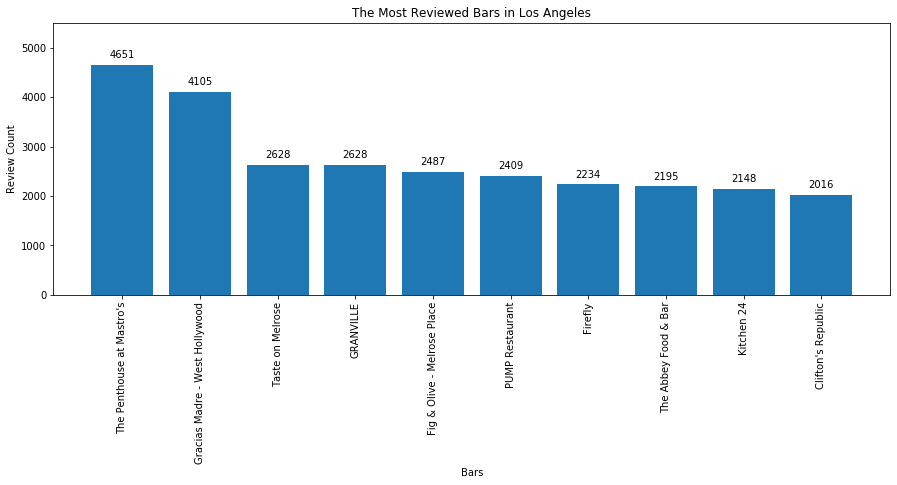

In [33]:
#Plotting the top 10 most reviewed bars
fig2, ax = plt.subplots(figsize = (15, 5))

y = round(top_10_list['review_count'],0)
ax.bar(top_10_list['name'],y)
ax.tick_params(axis = 'x', labelrotation = 90)
plt.ylim(0, 5500, 1000)
ax.set_title('The Most Reviewed Bars in Los Angeles')
ax.set_xlabel('Bars')
ax.set_ylabel('Review Count')

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

#Saved fig and made sure the labels fit in the png file
fig2.savefig('Figures/MostReviewedBars.png', bbox_inches='tight');

# Slide 11-12 - Number of Crimes by Pricepoint of Bars

In [34]:
#Loading the csv file to munge in pandas dataframe
bars_crime_df = pd.read_csv("Output Files/topfifty.csv")

bars_crime_df.head()

,name,review_count,lat,long,price,count_of_crimes
0,The Penthouse at Mastro's,4651,34.068933,-118.398747,$$$$,53
1,Gracias Madre - West Hollywood,4105,34.080795,-118.386972,$$,73
2,Taste on Melrose,2628,34.082573,-118.374798,$$,132
3,GRANVILLE,2628,34.145109,-118.255093,$$,40
4,Fig & Olive - Melrose Place,2487,34.083475,-118.376174,$$$,124


In [35]:
#Reduced the number of columns to just include the price and count of crimes columns
reduced_df = bars_crime_df[["price", "count_of_crimes"]]

In [36]:
#Checking to see the amount of bars per price point
cheap_bars = reduced_df.query('price == "$$"').price.count()
moderate_bars = reduced_df.query('price == "$$$"').price.count()
expensive_bars = reduced_df.query('price == "$$$$"').price.count()

bar_count = pd.DataFrame({"bars" : ["cheap", "moderate", "expensive"], "count" : [cheap_bars, moderate_bars, expensive_bars]})

bar_count

,bars,count
0,cheap,39
1,moderate,9
2,expensive,2


In [37]:
#Counted the number of crimes per price point and renamed the price category to read into the bar graph smoothly.
grouped_df = bars_crime_df.groupby(["price"]).sum()

grouped_df.reset_index(inplace=True)

grouped_df["price"] = ("Cheap", "Moderate", "Expensive")

grouped_df

,price,review_count,lat,long,count_of_crimes
0,Cheap,62900,1328.906927,-4614.951955,38445
1,Moderate,16321,306.663880,-1065.073998,8534
2,Expensive,5872,68.140872,-236.787159,126


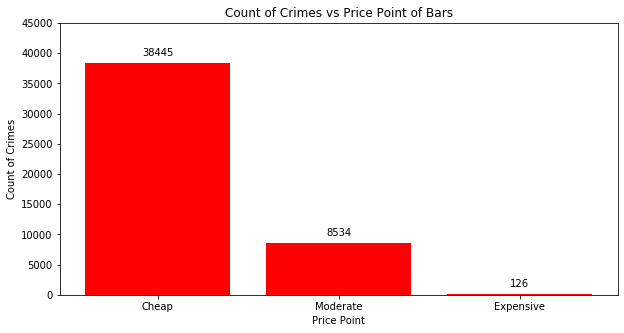

In [38]:
#Plotted and saved the results
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(grouped_df["price"], grouped_df["count_of_crimes"], color = "red")
ax.set_xlabel("Price Point")
ax.set_ylabel("Count of Crimes")
plt.ylim(0, 45000, 5000)
ax.set_title("Count of Crimes vs Price Point of Bars")

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

fig.savefig("Figures/count_crimes_bars.png");

In [39]:
#Created DataFrame to represent crime per bar per price point
divided_df = pd.DataFrame(grouped_df["count_of_crimes"].div(bar_count["count"]))
#Formatted the column name
divided_df.rename(columns = {0 : "crime_count_per_bar"}, inplace=True)
#Added price point for each ratio
divided_df["price"] = ("Cheap", "Moderate", "Expensive")

divided_df

,crime_count_per_bar,price
0,985.769231,Cheap
1,948.222222,Moderate
2,63.000000,Expensive


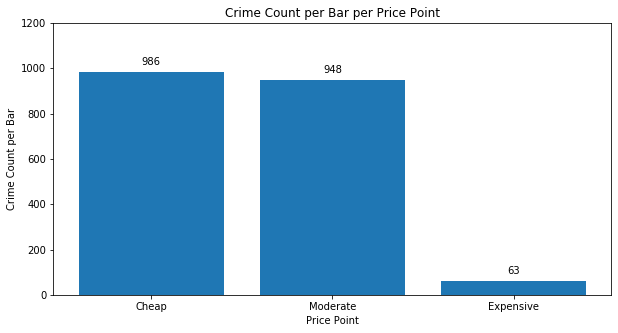

In [40]:
#Plotted the results of crime per bar per price point
fig2, ax2 = plt.subplots(figsize = (10, 5))

ax2.bar(divided_df["price"], divided_df["crime_count_per_bar"])
ax2.set_ylabel("Crime Count per Bar")
plt.ylim(0, 1200, 200)
ax2.set_xlabel("Price Point")
ax2.set_title("Crime Count per Bar per Price Point")

def add_value_labels(ax2, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax2.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax2.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax2)

fig2.savefig("Figures/crime_count_per_bar_per_price.png");